# <center>Hypothesis Testing Errors</center>


### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?
* ___Null Hypothesis:___
    * ___$H_{0}$___: The average network latency is less than or equal since we switched internet service providers.
    
    
* ___Alternative Hypothesis:___
    * ___$H_{a}$___: The average network latency is higher since we switched internet service providers.
    

* ___True Positive:___ 
    * The average network latency has gone up since switching internet service providers.


* ___True Negative:___
    * The average network latency is less than or equal since we switched internet service providers.


* ___Type I Error:___
    * We rejected the $H_{0}$ when we should have accepted the proposition and the network latency has actually gone down or stayed the same.


* ___Type II Error:___
    * We accepted the $H_{0}$ when we should have rejected the null hypothesis, meaning the network latency has actually gone up.
       

### Is the website redesign any good?

* ___Null Hypothesis:___
    * ___$H_{0}$___: The website redesign is same or worse than before.
    

* ___Alternative Hypothesis:___
    * ___$H_{a}$___: The website redesign is better than before.
    

* ___True Positive:___ 
    * The website redesign is better than before.


* ___True Negative:___
    * The website redesign is the same or worse than before.
    

* ___Type I Error:___
    * We rejected the $H_{0}$ when we should have accepted the proposition and the website has actually got worse or stayed the same.
    

* ___Type II Error:___
    * TWe accepted the $H_{0}$ when we should have rejected the null hypothesis, meaning the website has actually got.
    
    

### Is our television ad driving more sales?
* ___Null Hypothesis:___
    * ___$H_{0}$___: The television ads are not driving or lowering more sales.


* ___Alternative Hypothesis:___
    * ___$H_{a}$___: The television ads are driving more sales.


* ___True Positive:___ 
    * The television ads are infact driving more sales.


* ___True Negative:___
    * The television ads are either lowering or keeping sales the same.
    

* ___Type I Error:___
    * We rejected the $H_{0}$ when we should have accepted the proposition and the television ads have lowered or maintained sales.
    

* ___Type II Error:___
    * We accepted the $H_{0}$ when we should have rejected the null hypothesis, meaning the television ads have actually increased sales.

# <center>T-Test Mean Comparison</center>

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

* ${H}_0$: There is no difference between the average time it takes to sell homes between the two offices.


* ${H}_{a}$: There is a difference between the average time it takes to sell homes between the two offices.


#### Results:

* We would reject the ${H}_0$ hypothesis and state that there is a difference between the average time it takes to sell homes between the two offices.

In [1]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data


u1 = 90 # Number of mean in days
s1 = 15 # Standard deviation in days
n1 = 40 # Sample size of sales

u2 = 100 # Number of mean in days
s2 = 20 # Standard deviation in days
n2 = 50 # Sample size of sales

alpha = .05

t, p = (stats.ttest_ind_from_stats(u1, s1, n1, u2, s2, n2, equal_var=False))
print(*(t, p))

-2.7091418459143854 0.00811206270346016


Load the `mpg` dataset and use it to answer the following questions:

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
<center><h1>1999</h1></center> | <center><h1>2008</h1></center>
- | - 
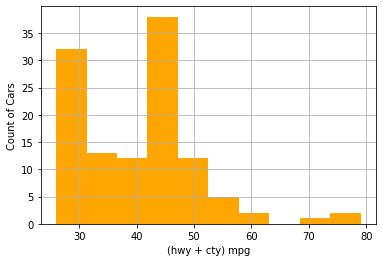|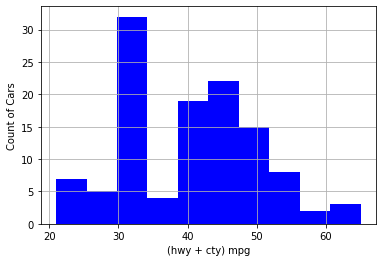

#### ${H}_0$:  
* There is no difference in fuel-efficiency in cars from 2008 vs 1999.

#### ${H}_{a}$: 
* There ___IS___ a difference in fuel-efficiency in cars from 2008 vs 1999.


#### Verify Assumptions:

1. Independent Samples, this is from 1-sample using the same data, so both observations exist in both sets.

2. Normal Distribution, or at least 30 observations. Due to there being enough observations ($observations \ge 30$) we can use this data.

3. The variances are not equal and we will compensate for this using the argument:
```python
equal_var = False
```


#### Results:

Result|1999 | 2008
-| - | - 
Variance|108.490|96.390
---|---|---
t|---|0.21960177245940962
p|---|0.8263750772060638


#### Analysis:

* Since our p-value is greater than our alpha (`.05`) we accept the ${H}_0$. Meaning the data is not-significant.  

In [2]:
mpg = data('mpg')
alpha = .05
mpg['avg_fe'] = (mpg.hwy + mpg.cty)/2


fuel_efficiency08 = mpg[mpg.year == 2008].avg_fe
fuel_efficiency99 = mpg[mpg.year == 1999].avg_fe

variance = fuel_efficiency99.var(), fuel_efficiency08.var()
t, p  = stats.ttest_ind(fuel_efficiency99, fuel_efficiency08, equal_var=False)
print(t, p)


0.21960177245940962 0.8263750772060638


### Are compact cars more fuel-efficent than the average car?
<center><h1>Compact</h1></center> | <center><h1>Not Compact</h1></center>
- | - 
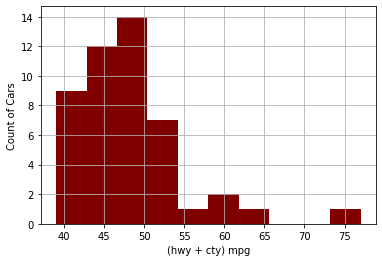|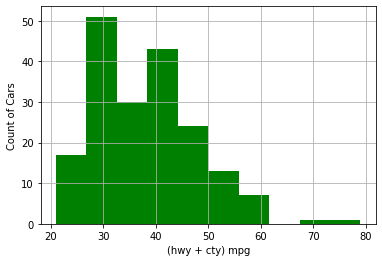

#### ${H}_0$: 
* Compact cars have a fuel efficiency less than or equal to that of the average car (non compact).

#### ${H}_{a}$:
* Compact cars have a fuel efficiency greater than of the average car (non compact).


#### Verify Assumptions:

1. Independent Samples, this is from 1-sample using the same data, so both observations exist in both sets.

2. Normal Distribution, or at least 30 observations. Due to there being enough observations ($observations \ge 30$) we can use this data.

3. The variances are not equal and we will compensate for this using the argument:
```python
equal_var = False
```


#### Results:

Result|Compact|Non Compact
-| - | - 
Variance|49.772|94.611
---|---|---
t|---|7.896888573132535
p|---|2.0992818971585668e-10


#### Analysis:

* Since our p-value is less than our alpha of ($.05$) we would reject the ${H}_0$ and accept our ${H}_{a}$, indicating compact cars are __more__ fuel efficient. 

In [3]:

compact = mpg[mpg['class'] == 'compact'].avg_fe
all_cars_mean = mpg.avg_fe.mean()

t, p  = stats.ttest_1samp(compact, all_cars_mean)
print(t, p/2)

7.896888573132535 2.0992818971585668e-10


### Do manual cars get better gas mileage than automatic cars?
<center><h1>Manual</h1></center> | <center><h1>Automatic</h1></center>
- | - 
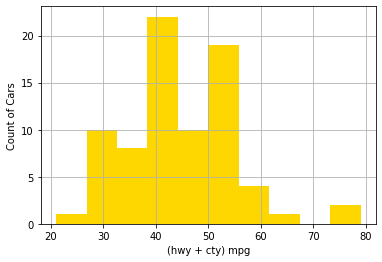|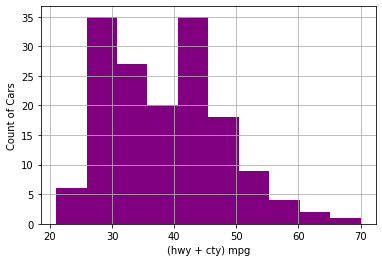

#### ${H}_0$: 


#### ${H}_{a}$:


#### Verify Assumptions:

1. Independent Samples, this is from 1-sample using the same data, so both observations exist in both sets.

2. Normal Distribution, or at least 30 observations. Due to there being enough observations ($observations \ge 30$) we can use this data.

3. The variances are not equal and we will compensate for this using the argument:
```python
equal_var = False
```


#### Results:

Result|Manual|Automatic
-| - | - 
Variance|26.635|21.943
---|---|---
t|---|4.443514012903071
p|---|1.795224899991793e-05


#### Analysis:

* Since our p-value is greater than our alpha (`.05`) we accept the ${H}_{a}$. This means that the manual cars have a better gas mileage than automatic cars.

In [4]:

manual = mpg[mpg.trans.str.contains('manual')].avg_fe
automatic = mpg[mpg.trans.str.contains('auto')].avg_fe 

variance = round(manual.var(), 3), round(automatic.var(), 3)
t, p  = stats.ttest_ind(manual, automatic, equal_var=False)


<center><h1>Correlation</h1></center>

#### Does tenure correlate with monthly charges?

<center><h1>Tenure</h1></center> | <center><h1>Monthly Charges</h1></center>
- | - 
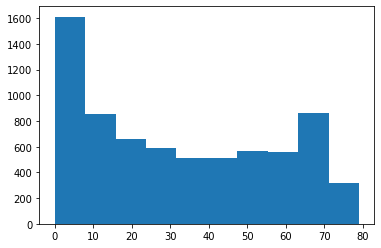|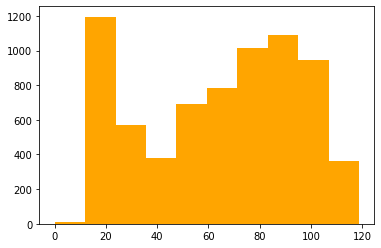


#### Results:

Correlation|P-Value
- | - 
0.24946124421901167|1.819467157882263e-100



#### Analysis:

* This indicates there is a very weak correlation between tenure and monthly charges.

In [5]:
telco = pd.read_csv('telco_csv_data.csv')

def make_float(cell):
    ''' This function is to remove any 'DIV/0' errors that may have been saved within the data
    set and to convert everything to float.
    '''
    try:
        float(cell)
        return float(cell)
    except:
        return 0
    
tenure = telco.tenure

# Ensures all inputs are valid in the Series
amc = telco.avg_monthly_charges.apply(lambda x: make_float(x))

corr, p = stats.pearsonr(tenure, amc)
corr, p

(0.24946124421901175, 1.819467157882263e-100)

#### Does tenure correlate with total charges?

<center><h1>Tenure</h1></center> | <center><h1>Total Charges</h1></center>
- | - 
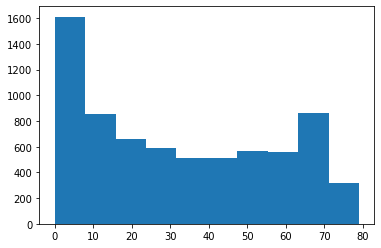|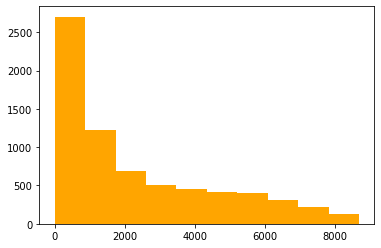


#### Results:

Correlation|P-Value
- | - 
0.8262111781262838|0.0



#### Analysis:

* This indicates there is a strong correlation between tenure and total monthly charges.

In [6]:

total_charges = telco.total_charges
telco.total_charges.fillna(0, inplace=True) # This is to replace blank values with 0
total_charges.astype('float')

corr, p = stats.pearsonr(tenure, total_charges)

#### What happens if you control for phone and internet service?

<center><h1>Has Phone</h1></center> | <center><h1>Has Internet</h1></center>
- | - 
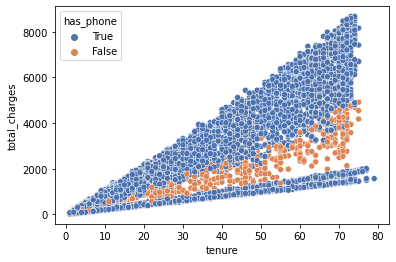|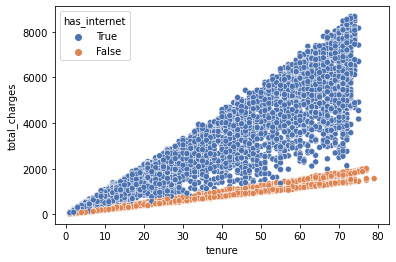


#### Results:

Controll|Correlation|P-Value
- | - | - 
`has_internet`|0.9327605426061029|0.0
`has_phone`|0.8301133309948348|0.0


#### Analysis:

* This indicates there is a correlation between tenure and total monthly charges, when controlling for internet and phone.

In [7]:
x, y = telco[telco.has_phone == True].tenure.fillna(0), telco[telco.has_phone == True].total_charges.fillna(0)
# sns.scatterplot(data=telco, x='tenure', y='total_charges', hue='has_internet', palette='deep', hue_order=[True, False])
corr, p = stats.pearsonr(x, y)
corr, p

(0.8301133309948348, 0.0)

<h1><center>Chi Squared</center></h1>


### 1. Use the following contingency table to help answer the question of: 


&nbsp;| Codeup Student | Not Codeup Student |&nbsp;
:- | :- | :- | :-
Uses a Macbook|	49|	20 | 69
Doesn't Use A Macbook|	1|	30 | 31
&nbsp; | 50 | 50 | 100


In [64]:
import IPython
from IPython.display import Markdown

data = [{'uses_macbook': True, 'is_codeup_student' :True}] * 49
data.extend([{'uses_macbook': False, 'is_codeup_student' :True}])
data.extend([{'uses_macbook': True, 'is_codeup_student' :False}] * 20)
data.extend([{'uses_macbook': False, 'is_codeup_student' :False}] * 30)

macbook_df = pd.DataFrame(data)

observed = pd.crosstab(macbook_df.is_codeup_student, macbook_df.uses_macbook)
chi2, p, degf, expected = stats.chi2_contingency(observed)

result = f'''
### These are the calculated expected proportions
&nbsp;| Codeup Student | Not Codeup Student |&nbsp;
:- | :- | :- | :-
Uses a Macbook|	{expected[0][0]:0.2f}|	{expected[0][1]:0.2f}
Doesn't Use A Macbook|	{expected[1][0]:0.2f}|	{expected[1][1]:0.2f}
&nbsp; | 50 | 50 | 100

### Whether using a macbook and being a codeup student are independent of each other?

* Since the p-value is {p:0.11f} and that is less than our alpha of .05, then we can
say that they are independent of each other.
'''

Markdown(result)



### These are the calculated expected proportions
&nbsp;| Codeup Student | Not Codeup Student |&nbsp;
:- | :- | :- | :-
Uses a Macbook|	15.50|	34.50
Doesn't Use A Macbook|	15.50|	34.50
&nbsp; | 50 | 50 | 100

### Whether using a macbook and being a codeup student are independent of each other?

* Since the p-value is 0.00000000141 and that is less than our alpha of .05, then we can
say that they are independent of each other.


### 2. Choose another 2 categorical variables from the `mpg` dataset and perform a $chi^2$

#### I choose to compare the categories of `class` vs `trans` and are they related to one another?

* ${H}_0$: 
    * The categories of `class` and `trans` are not associated with one another.


* ${H}_{a}$: 
    * The categories of `class` and `trans` are associated with one another.


In [65]:
mpg['transmission'] = mpg.trans.str[:-4]
observed = pd.crosstab(mpg['class'], mpg.transmission)

result = f'''
### This is the crosstab table class vs trans
&nbsp;|Auto | Manual
:- | :- | :- 
'''
for index, row, in observed.iterrows():
    result += f"{index}| {row.auto}| {row.manual}\n"

    
chi2, p, degf, expected = stats.chi2_contingency(observed)
result+= f'''
### Upon comparing the `class` vs `trans` I've discovered that the p-value is: {p}'''

result += '''
Which indicates that we will reject the ${H}_0$ and come to the conclusion that:
* ${H}_{a}$: 
    * The categories of `class` and `trans` are associated with one another.
'''
Markdown(result)


### This is the crosstab table class vs trans
&nbsp;|Auto | Manual
:- | :- | :- 
2seater| 2| 3
compact| 24| 23
midsize| 29| 12
minivan| 11| 0
pickup| 20| 13
subcompact| 16| 19
suv| 55| 7

### Upon comparing the `class` vs `trans` I've discovered that the p-value is: 7.4513729838250925e-06
Which indicates that we will reject the ${H}_0$ and come to the conclusion that:
* ${H}_{a}$: 
    * The categories of `class` and `trans` are associated with one another.


### 3.  Use the data from the employees database to answer these questions:

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    * ${H}_0$: 
        * The categories of `dept_name` and `gender` are not associated with one another.

    * ${H}_{a}$: 
        * The categories of `dept_name` and `gender` are associated with one another.


In [82]:
from env import user, password, host

def get_db_url(username: str, hostname: str , password: str, database_name: str):
    '''
    Takes username, hostname, password and database_name and 
    returns a connection string
    '''
    connection = f'mysql+pymysql://{username}:{password}@{hostname}/{database_name}'
    
    return connection

conn = get_db_url(username=user, password=password, hostname=host, database_name='employees')

sql = '''
select dept_name, gender
from employees
join dept_emp
on dept_emp.emp_no = employees.emp_no
join departments
on departments.dept_no = dept_emp.dept_no
and dept_name in ('Sales', 'Marketing')
and to_date >= now();
'''

employee_df = pd.read_sql(sql, conn)

observed = pd.crosstab(employee_df.dept_name, employee_df.gender)

chi2, p, degf, expected = stats.chi2_contingency(observed)

results = f'''
### Due to our p-value being {p} which is greater than .05, this indicates that we would fail to reject our null hypothesis.

'''

results += '''
* ${H}_0$: 
    * The categories of `dept_name` and `gender` are not associated with one another.
'''
Markdown(results)


### Due to our p-value being 0.5691938610810126 which is greater than .05, this indicates that we would fail to reject our null hypothesis.


* ${H}_0$: 
    * The categories of `dept_name` and `gender` are not associated with one another.


### Is an employee's gender independent of wheather or not they are or have been a manager?

* ${H}_0$: 
    * The categories of `manager` and `gender` are not associated with one another.

* ${H}_{a}$: 
    * The categories of `manager` and `gender` are associated with one another.
    

In [89]:

# We are selecting all titles that any employee has ever held because the question asks if they are or have been.
# Which would even include employees with multiple titles.
manager_sql = '''
select title, gender
from employees
join dept_emp
on dept_emp.emp_no = employees.emp_no
join titles
on titles.emp_no = employees.emp_no;
'''

manager_df = pd.read_sql(manager_sql, conn)


observed = pd.crosstab(manager_df.title, manager_df.gender)

chi2, p, degf, expected = stats.chi2_contingency(observed)

results = f'''
### Due to our p-value being {p} which is greater than .05, this indicates that we would fail to reject our null hypothesis.

'''

results += '''
* ${H}_0$: 
    * The categories of `manager` and `gender` are __NOT__ associated with one another.
'''
Markdown(results)


### Due to our p-value being 0.3889674462309813 which is greater than .05, this indicates that we would fail to reject our null hypothesis.


* ${H}_0$: 
    * The categories of `manager` and `gender` are __NOT__ associated with one another.
